In [115]:
from pymongo import MongoClient
from gensim.utils import simple_preprocess

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

cursor = collection.aggregate([
    {
        "$match": {
            # "placeId": "ChIJX3TjkesodTERApMQACilF1E",
            "sentiment": "positive",
            "$expr": {"$gte": ["$pos_prop", "$neg_prop"]},
            "$expr": {"$gte": ["$Predict_rating", 3]}
        }
    }
])

sentences = []
sentiments = []
for document in cursor:
    # Thêm các câu vào danh sách
    sentences.extend(document['sentences'])
    # Thêm sentiment tương ứng
    sentiments.extend(['positive'] * len(document['sentences']))

# Tiền xử lý văn bản
cleaned_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in sentences]

# In ra câu thứ 21 trong danh sách các câu có sentiment là "positive"
print(len(cleaned_sentences))
print(cleaned_sentences[:20])


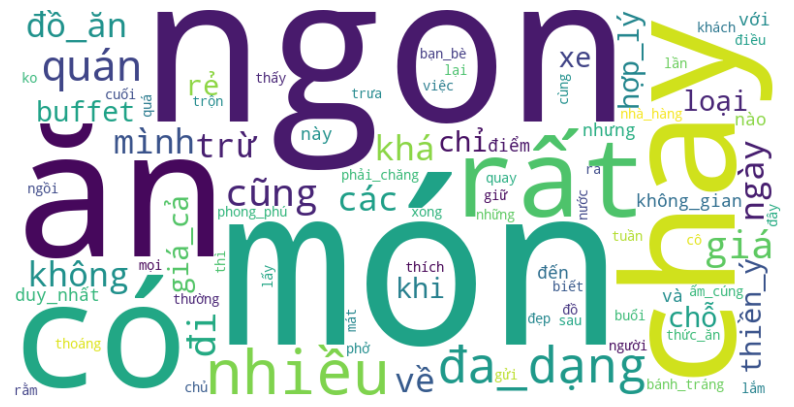

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Khởi tạo CountVectorizer với các thiết lập phù hợp
vectorizer = CountVectorizer(ngram_range=(2, 10), max_features=100)

# Chuyển đổi dữ liệu thành ma trận đếm
X = vectorizer.fit_transform(cleaned_sentences)

# Lấy danh sách các từ và cụm từ
feature_names = vectorizer.get_feature_names_out()

# Tạo WordCloud từ danh sách các từ và cụm từ
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(feature_names))

# Hiển thị WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [85]:
# Danh sách các từ chứa ký tự '_'
compound_words = []

# Lặp qua từng câu
for sentence in cleaned_sentences:
    # Tách từng từ trong câu
    words = sentence.split()
    # Kiểm tra từng từ trong câu
    for word in words:
        # Nếu từ chứa ký tự '_' và chỉ chứa ký tự viết thường, thêm vào danh sách compound_words
        if '_' in word and word.islower():
            compound_words.append(word)

print(len(compound_words))
print(compound_words[:20])


794
['đồ_ăn', 'phong_phú', 'sạch_sẽ', 'bày_biện', 'đồ_ăn', 'đồ_ăn', 'đa_dạng', 'bà_con', 'xôi_vò', 'đối_diện', 'lưu_niệm', 'quần_áo', 'máy_lạnh', 'yên_tĩnh', 'đồ_ăn', 'đa_dạng', 'tự_phục_vụ', 'lịch_sự', 'gọn_gàng', 'sạch_sẽ']


In [110]:
# Danh sách các từ chứa ký tự '_'
compound_words = []

# Lặp qua từng câu
for sentence in cleaned_sentences:
    # Tách từng từ trong câu
    words = sentence.split()
    # Kiểm tra từng từ trong câu
    for i, word in enumerate(words):
        # Nếu từ chứa ký tự '_' và chỉ chứa ký tự viết thường
        if '_' in word and word.islower():
            compound_words.append(word)
            # Kiểm tra nếu từ đó không phải là từ cuối cùng trong câu và từ tiếp theo không chứa ký tự '_'
            if i + 1 < len(words) and '_' not in words[i + 1]:
                # Thêm từ hoặc cụm từ ở đằng sau vào danh sách compound_words
                compound_words.append(words[i + 1])

print(len(compound_words))
print(compound_words[:20])


1417
['đồ_ăn', 'ngon', 'phong_phú', 'sạch_sẽ', 'bày_biện', 'đẹp', 'đồ_ăn', 'nhiều', 'đồ_ăn', 'đa_dạng', 'ăn', 'bà_con', 'xôi_vò', 'món', 'đối_diện', 'quán', 'lưu_niệm', 'quần_áo', 'nhang', 'máy_lạnh']


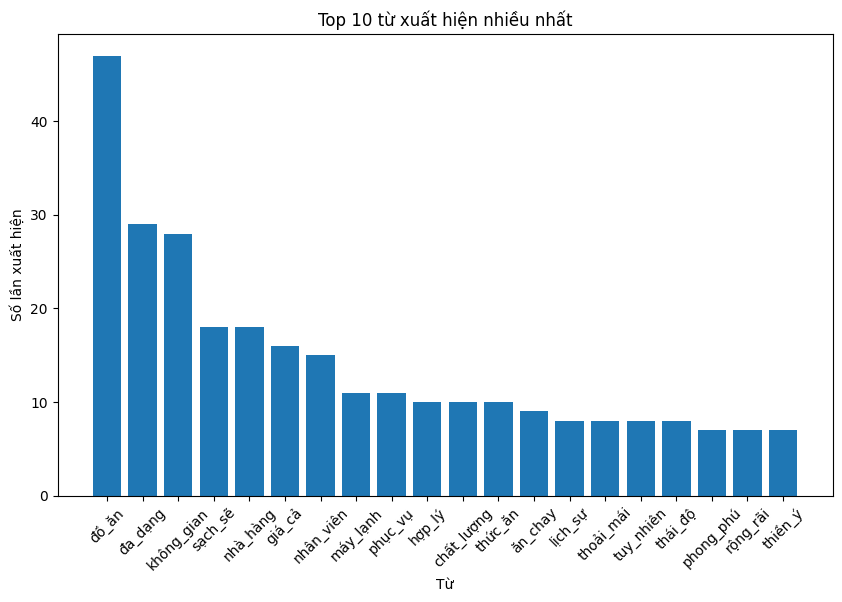

In [86]:
from collections import Counter
import matplotlib.pyplot as plt

# Tính toán tần suất xuất hiện của từng từ
word_freq = Counter()
for sentence in compound_words:
    words = sentence.split()
    word_freq.update(words)

# Lấy ra các từ có tần suất xuất hiện cao nhất (ví dụ: 10 từ đầu tiên)
top_words = dict(word_freq.most_common(20))

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 từ xuất hiện nhiều nhất')
plt.xticks(rotation=45)
plt.show()


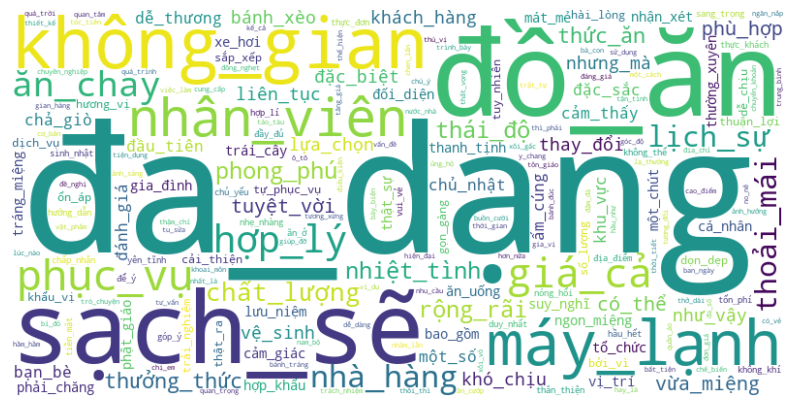

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo word cloud từ word_freq
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Hiển thị word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [78]:
from pymongo import MongoClient
from gensim.utils import simple_preprocess

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

cursor = collection.aggregate([
    {
        "$match": {
            "placeId": "ChIJX3TjkesodTERApMQACilF1E",
            "sentiment": "negative",
            "$expr": {"$lte": ["$pos_prop", 3]}
        }
    }
])


sentences = []
sentiments = []
for document in cursor:
    # Thêm các câu vào danh sách
    sentences.extend(document['sentences'])
    # Thêm sentiment tương ứng
    sentiments.extend(['negative'] * len(document['sentences']))

# Tiền xử lý văn bản
cleaned_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in sentences]

# In ra câu thứ 21 trong danh sách các câu có sentiment là "positive"
print(len(sentences))
print(sentences[:20])
print(cleaned_sentences)


375
['Đồ_ăn tệ không phong_phú so với giá 120k / người .', 'Người phục_vụ thái_độ , mọi người ko nên ăn_ở đây , ăn mà tâm muốn tịnh lắm cũng không tịnh nổi', 'Phải nói quán có món súp , ngon bá cháy nhé bà_con .', 'Và món lẩu nấm + món xôi_vò . 3 món phải nói là đúng đỉnh .', 'Gửi xe ở đối_diện quán ( phí họ thu 1 xe là 5k ) mới vào quán thì sẽ gặp quầy bán đồ lưu_niệm , quần_áo , nhang đèn , tượng , vv ... quán có chỗ máy_lạnh và không có máy .', 'Tuỳ khách chọn khu ngồi .', 'Yên_tĩnh .', 'Đồ_ăn đa_dạng , giá phải_chăng , không_gian rộng_rãi', 'Đồ_ăn đa_dạng , tự_phục_vụ nhưng rất lịch_sự .', 'Buffet gọn_gàng sạch_sẽ', 'Rất xứng_đáng cho buffet ..', 'Nhiều món : ..', 'Đồ nguội : chả_giò / các loại chả đồ nguội , nem ..', 'Đồ chính : cơm / phở / hủ_tiếu bánh_hỏi / Xôi ..', 'Đồ chiên / Xào / Nướng ..', 'Lẩu / Súp / Cà_ri ..', 'Ăn vặt : bánh_tráng trộn / chè các loại / nước detox', 'Món ăn đa_dạng , tươi .', 'Không_gian quán rộng , thiết_kế chia làm nhiều khi vực nên chọn chỗ ngồi khá th

In [80]:
# Danh sách các từ chứa ký tự '_'
compound_words = []

# Lặp qua từng câu
for sentence in cleaned_sentences:
    # Tách từng từ trong câu
    words = sentence.split()
    # Kiểm tra từng từ trong câu
    for word in words:
        # Nếu từ chứa ký tự '_' và chỉ chứa ký tự viết thường, thêm vào danh sách compound_words
        if '_' in word and word.islower():
            compound_words.append(word)

print(len(compound_words))
print(compound_words[:20])


836
['đồ_ăn', 'phong_phú', 'phục_vụ', 'thái_độ', 'ăn_ở', 'bà_con', 'xôi_vò', 'đối_diện', 'lưu_niệm', 'quần_áo', 'máy_lạnh', 'yên_tĩnh', 'đồ_ăn', 'đa_dạng', 'phải_chăng', 'không_gian', 'rộng_rãi', 'đồ_ăn', 'đa_dạng', 'tự_phục_vụ']


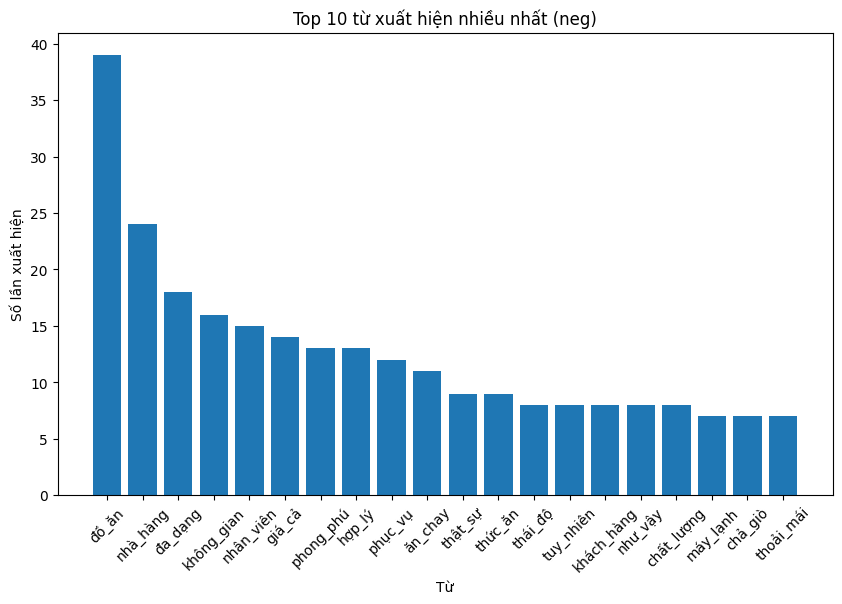

In [81]:
from collections import Counter
import matplotlib.pyplot as plt

# Tính toán tần suất xuất hiện của từng từ
word_freq = Counter()
for sentence in compound_words:
    words = sentence.split()
    word_freq.update(words)

# Lấy ra các từ có tần suất xuất hiện cao nhất (ví dụ: 10 từ đầu tiên)
top_words = dict(word_freq.most_common(20))

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 từ xuất hiện nhiều nhất (neg)')
plt.xticks(rotation=45)
plt.show()
